# ROOT (CMS) - like plots in matplotlib
## ROOT
- Default ROOT font that is used in CMS is Helvetica, but ROOT just uses system fonts, so when you render plots on a PC it silently swtiches to Arial

## Fonts, Math-Fonts and Serifs
- Math fonts are a separate set from regular fonts due to the amount of special characters
- It's not trivial to make sure you get a matching math font to your regular font
- Most math-fonts are serif fonts, but this is not ideal if one wants to use sans-serif font for normal text like Arial
- The number of sans-serif math-fonts is very limited 
 - The number of **open** sans-serif math-fonts is extremely limited 
 
## matplotlib
- Use Arial as a default for both fonts to be consistent with typical ROOT output and TDR requirements
- Switch to open type fonts or commission a sans-font directly for use of CMS (or CERN)


# First run
- see if it's possible to distribute a ROOT like mpl style
- see if it's possible to package fonts along with it.
- package some helpful styling fucntions in format `ax = fcn(ax,...)`
```
pip install cmsstyle
```

## Styling
- Defaults are defined in an `rcParams` dictionary
- Ideally use rcParams and with.style.context()
```
with pyplot.style.context(['hep']):
    plotting...
```    
- but, this is buggy, doesn't seem to work properly for fonts
- also no plans by mpl devs to fix this behaviour https://github.com/matplotlib/matplotlib/issues/11673

For now one has to set the style globally
```
plt.style.use(['ROOT'])
```

### Available styles:

- `plt.style.use(['ROOT'])` - Default (figure 10x10 inches, full column size)
- `plt.style.use(['ROOTs'])` - Default (figure 6x6 inches, half column size)
- `plt.style.use(['fira'])` - use Fira Sans (open typeface)
- `plt.style.use(['firamath'])` - use Fira Math (open typeface)

#### Styles can be chained:
- `plt.style.use(['ROOT', 'fira', 'firamath'])`

### Styling with LaTeX
- `plt.style.use(['ROOTtex'])` - Use LaTeX to produce all text labels
- Actual Helvetica if available as part of you tex-live distro
- Use sansmath as the math font
- Takes longer and not always better
- In general more possibilities, but more difficult to get it working properly


# Minimal working example

In [15]:
#mpl.rcParams['datapath']
mpl.get_cachedir()

'/home/anovak/.cache/matplotlib'

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#plt.style.use(['ROOT', 'firamath'])
plt.style.use(['ROOT'])

from cmsstyle import *

f,ax = plt.subplots()

ax.scatter(range(10), range(10))
ax.set_xlim(0,10)
ax.set_ylim(0,10)

#ax = cms_annot(ax, data=True, lumi=1)
ax = cms_annot(ax, data=True, lumi=1, fontname='Arial')
ax = cms_ticks(ax)

# from matplotlib import rcParams
# import matplotlib.pyplot as plt
# _font_size = rcParams['font.size']

# cms = ax.annotate('CMS', xy=(0.001, 1.015), xycoords='axes fraction', fontsize=_font_size*1.3, fontname='TeX Gyre Heros',
#                 ha='left', fontweight='bold', annotation_clip=False)

# ax.annotate('Simulation', xy=(0.001, 1.015), xycoords='axes fraction', fontsize=_font_size, fontname='TeX Gyre Heros', 
#                 xytext=(cms.get_window_extent(renderer=plt.gcf().canvas.get_renderer()).width*1.06  , 0), textcoords='offset points',
#                 fontstyle='italic', 
#                 ha='left', annotation_clip=False)


# cms = ax.annotate('CMS', xy=(0.501, 1.015), xycoords='axes fraction', fontsize=_font_size*1.3, fontname='Arial',
#                 ha='left', fontweight='bold', annotation_clip=False)

# ax.annotate('Simulation', xy=(0.501, 1.015), xycoords='axes fraction', fontsize=_font_size, fontname='Arial', 
#                 xytext=(cms.get_window_extent(renderer=plt.gcf().canvas.get_renderer()).width*1.06  , 0), textcoords='offset points',
#                 fontstyle='italic', 
#                 ha='left', annotation_clip=False)

# cms = ax.annotate('CMS', xy=(0.501, 0.815), xycoords='axes fraction', fontsize=_font_size*1.3, fontname='Helvetica',
#                 ha='left', fontweight='bold', annotation_clip=False)

# ax.annotate('Simulation', xy=(0.501, 0.815), xycoords='axes fraction', fontsize=_font_size, fontname='Helvetica', 
#                 xytext=(cms.get_window_extent(renderer=plt.gcf().canvas.get_renderer()).width*1.06  , 0), textcoords='offset points',
#                 fontstyle='italic', 
#                 ha='left', annotation_clip=False)

# ax.annotate("CMS&", xy=(0.12, 0.05), xycoords='axes fraction', fontsize = "large", fontname='TeX Gyre Heros', fontweight='bold',
#              ha='left', annotation_clip=False, fontstyle='italic')

f.savefig('/home/anovak/Desktop/test.pdf')
f.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/anovak/software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


# Extended

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


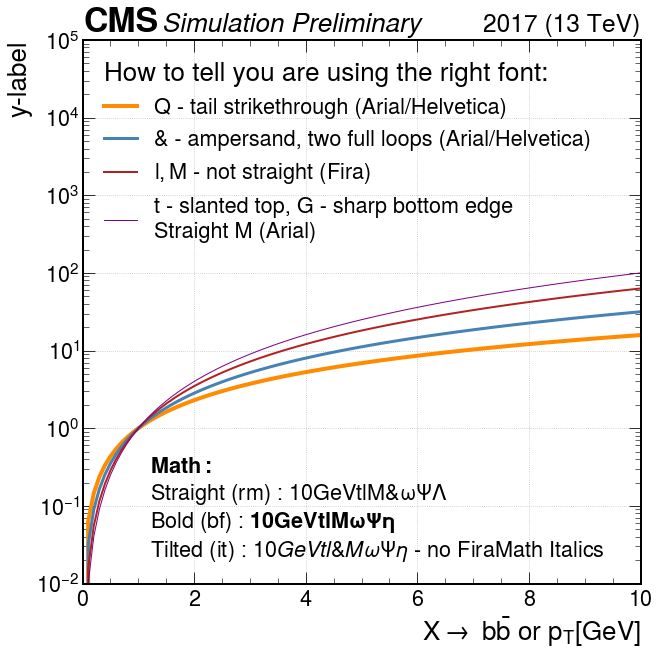

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

from cmsstyle import *
plt.style.use(['ROOT', "firamath"])
plt.style.use(['ROOT'])

import numpy as np
C = ['darkorange', 'steelblue', 'firebrick', 'purple']

# Figure
f, ax = plt.subplots()

# Make some data
x = np.linspace(0,10,101)
y0 = x**(1.2)
y1 = x**(1.5)
y2 = x**(1.8)
y3 = x**(2)

ax.plot(x, y0, lw=4, label=r"Q - tail strikethrough (Arial/Helvetica) ", c=C[0])
ax.plot(x, y1, lw=3, label=r"& - ampersand, two full loops (Arial/Helvetica)", c=C[1])
ax.plot(x, y2, lw=2, label=r"$\mathrm{l, M}$ - not straight (Fira)", c=C[2])
ax.plot(x, y3, lw=1, label=r"t - slanted top, G - sharp bottom edge" "\n" r"Straight M (Arial)", c=C[3])

# Set limits and labels
ax.set_xlim(0,10)
ax.set_ylim(0.01,100000)
ax.set_xlabel(r'$\mathrm{X \rightarrow\ b\bar{b}}$ or $\mathrm{p_T [GeV]}$', ha='right', x=1.0)
ax.set_ylabel('y-label', ha='right', y=1.0)

# Legend
leg = ax.legend(borderpad=0.5, frameon=False, loc=2)
leg.set_title('How to tell you are using the right font:')
leg._legend_box.align = "left" # Align legend title

# Annotationg and math examples
math_desc =  r"$\mathbf{Math:}$" \
      + "\n" +r"Straight (rm) : $\mathrm{10GeVtlM&\omega\Psi\Lambda}$" \
      + "\n" +r"Bold (bf) : $\mathbf{10GeVtlM\omega\Psi\eta}$" \
      + "\n" +r"Tilted (it) : $\mathit{10GeVtl&M\omega\Psi\eta}$ - no FiraMath Italics" 
ax.annotate(math_desc, xy=(0.12, 0.05), xycoords='axes fraction', fontsize = "small",
             ha='left', annotation_clip=False)

# Apply CMS labels and ticks
#ax = cms_annot(ax, data=True, lumi=2.5)
ax = cms_annot(ax)

ax.grid()
ax.semilogy()
f.savefig('/home/anovak/Desktop/test.pdf')
#f.show()
